### Below I have data for a Churn analyis. In this analysis I intend on finding the most significant variables to consider when thinking of why customers change service providers. I want  to find out which variables can derive the most insight during a deeper, future analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('/Users/hamadwaheed/Desktop/churn_raw_data.csv')


In [3]:
df.head(5)


,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


# Detecting and Inspecting Missing Values

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### As we can see here we have a set of 51 variables. Most of these are categorical and objects, and some are #### floats and itegers. variables 44-51 are unknown thereby they are irrelevant for our analysis, we will drop them


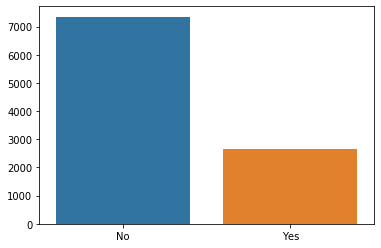

In [5]:
y = df['Churn'].value_counts()
sns.barplot(y.index, y.values)

#### Here have a plot of the churn rate, as we can see it is about 1/3 of total number of clients. This is far too high and exemplifies the fundamental reason for this analysis. All our inquiries and methods emanate from this initial observation.

#### We'll begin by dropping the irrrelevant items first and foremost

In [6]:
del df['item1']

In [7]:
del df['item2']

In [8]:
del df['item3']

In [9]:
del df['item4']

In [10]:
del df['item5']

In [11]:
del df['item6']

In [12]:
del df['item7']

In [13]:
del df['item8']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

#### Now that we've dropped those variables we are left with 43, out of these 43 we will find which ones contain null values

In [15]:
df.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

#### after executing the above code we can see that Childre, Age, Income, Techie, Phone, Tech Support, Tenure, and Bandwith all have missing values. Below we take a closer look and we can see that we see that Techie, Phone, and Tech support are objects, the rest are quantitavie variables and the null values in Children account for 2000 rows. We can't drop all those rows so our best option is to fill the null values in Children and the other quantitative variables with the mean for each row

In [16]:
df[['Children' , 'Age' , 'Income' , 'Techie' , 'Phone' , 'TechSupport' , 'Tenure' , 'Bandwidth_GB_Year']].head(15)

,Children,Age,Income,Techie,Phone,TechSupport,Tenure,Bandwidth_GB_Year
0,NaN,68.0,28561.99,No,Yes,No,6.795513,904.536110
1,1.0,27.0,21704.77,Yes,Yes,No,1.156681,800.982766
2,4.0,50.0,NaN,Yes,Yes,No,15.754144,2054.706961
3,1.0,48.0,18925.23,Yes,Yes,No,17.087227,2164.579412
4,0.0,83.0,40074.19,No,No,Yes,1.670972,271.493436
5,3.0,83.0,NaN,No,Yes,No,7.000994,1039.357983
6,0.0,NaN,11467.50,Yes,Yes,Yes,13.236774,1907.242972
7,2.0,NaN,26759.64,Yes,No,No,NaN,979.612708
8,2.0,49.0,58634.51,NaN,Yes,No,8.220686,1312.874964
9,NaN,86.0,50231.40,NaN,Yes,NaN,3.422086,508.763791


In [17]:
df.mean()

Unnamed: 0               5000.500000
CaseOrder                5000.500000
Zip                     49153.319600
Lat                        38.757567
Lng                       -90.782536
Population               9756.562400
Children                    2.095936
Age                        53.275748
Income                  39936.762226
Outage_sec_perweek         11.452955
Email                      12.016000
Contacts                    0.994200
Yearly_equip_failure        0.398000
Tenure                     34.498858
MonthlyCharge             174.076305
Bandwidth_GB_Year        3398.842752
dtype: float64

#### Here we can observe the mean for each variable

## Replaced Null values in numerical rows with mean

In [18]:
df.fillna(df.mean() ,inplace=True)

In [19]:
df[['Children' , 'Age' , 'Income' , 'Techie' , 'Phone' , 'TechSupport' , 'Tenure' , 'Bandwidth_GB_Year']].head(15)

,Children,Age,Income,Techie,Phone,TechSupport,Tenure,Bandwidth_GB_Year
0,2.095936,68.000000,28561.990000,No,Yes,No,6.795513,904.536110
1,1.000000,27.000000,21704.770000,Yes,Yes,No,1.156681,800.982766
2,4.000000,50.000000,39936.762226,Yes,Yes,No,15.754144,2054.706961
3,1.000000,48.000000,18925.230000,Yes,Yes,No,17.087227,2164.579412
4,0.000000,83.000000,40074.190000,No,No,Yes,1.670972,271.493436
5,3.000000,83.000000,39936.762226,No,Yes,No,7.000994,1039.357983
6,0.000000,53.275748,11467.500000,Yes,Yes,Yes,13.236774,1907.242972
7,2.000000,53.275748,26759.640000,Yes,No,No,34.498858,979.612708
8,2.000000,49.000000,58634.510000,NaN,Yes,No,8.220686,1312.874964
9,2.095936,86.000000,50231.400000,NaN,Yes,NaN,3.422086,508.763791


In [20]:
df.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

#### We replaced all the quantitative variables with the mean. The variables with objects will remain the same because they will not skew the data in any diretion, they have too many associated variable values that we do not want to lose, and they could serve as an insight for later analysis. Notice Techsupport has null values, yet in the future it is still possible to draw insight from that variable, and maybe it could contribute to our understanding in the churn rate, even if it will not be considered in the Principal Component Analysis

# Detecting and Removing Outliers

#### Now that we've mitigated all the null values we can detect outliers in our quantitative variables to gain a better understanding of each variable 

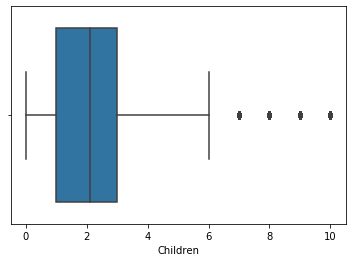

In [21]:
sns.boxplot(x=df['Children'])

#### We can see here that we only have a few outliers when it comes to Children, to clean up the data and exemplify how we handle outliers, we'll take them out and have another look

In [22]:
Children = df['Children']

In [23]:
Q1 = Children.quantile(0.25)
Q3 = Children.quantile(0.75)
IQR = Q3 - Q1

pmin = Q1 - 1.5 *IQR
pmax = Q3 + 1.5 *IQR
NChildren = Children.where(Children.between(pmin, pmax))

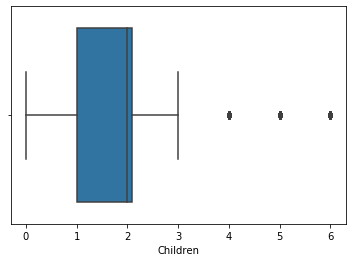

In [24]:
sns.boxplot(x=NChildren)

#### We've taken out the initial outliers and ran the boxplot again, it has given us a series of new outliers, its safe to say that we've taken care of our initial outliers

In [25]:
Children.where(Children.between(pmin, pmax), inplace=True)

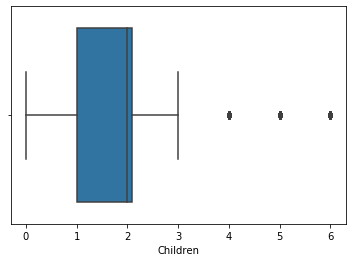

In [26]:
sns.boxplot(x=df['Children'])

#### Above we've contributed these changes back to the original dataset

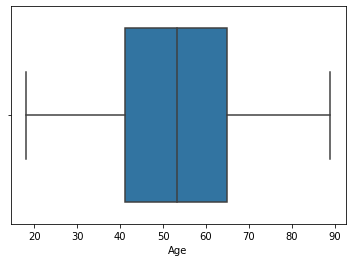

In [27]:
sns.boxplot(x=df['Age'])

#### Age has no outliers!

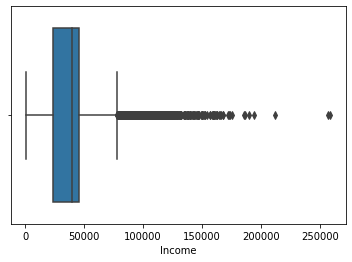

In [28]:
sns.boxplot(x=df['Income'])

#### The income variable is an interesting case. We have a lot of outliers! We know through common knowledge that there is an income gap, this may be relevant in contributing to churn rate insights. We are not going to remove these outliers because they might prove to be useful during the exploratory analysis!

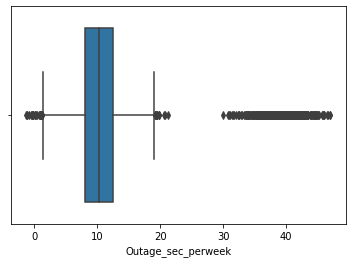

In [29]:
sns.boxplot(x=df['Outage_sec_perweek'])

#### We see the same trend occur for Outages sec per week. These outlier values may be of signifiance when determining what contributes to the churn rate so we will leave them

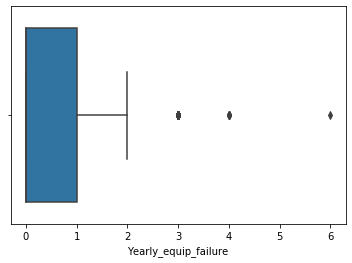

In [30]:
sns.boxplot(x=df['Yearly_equip_failure'])

#### We only have three outliers in the Yearly equipment failure rate, it is safe to assume that they are not contributing to the Churn analysis and we can remove them. Below we create the edges of the box and whisker plot, and keep all the values inside, excluding the outliers

In [31]:
Yearly = df['Yearly_equip_failure']

In [32]:
Q1 = Yearly.quantile(0.25)
Q3 = Yearly.quantile(0.75)
IQR = Q3 - Q1

pmin = Q1 - 1.5 *IQR
pmax = Q3 + 1.5 *IQR
NYearly = Yearly.where(Yearly.between(pmin, pmax))

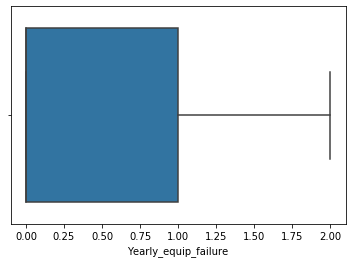

In [33]:
sns.boxplot(x=NYearly)

In [34]:
Yearly.where(Yearly.between(pmin, pmax), inplace=True)

#### We've programmed the values back into the initial dataset and have succesfully removed the outliers.

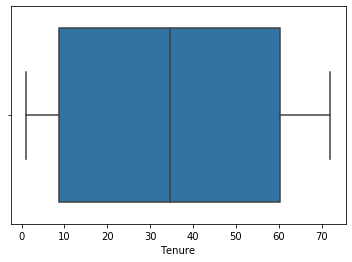

In [35]:
sns.boxplot(x=df['Tenure'])

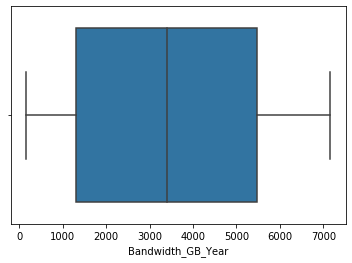

In [36]:
sns.boxplot(x=df['Bandwidth_GB_Year'])

#### Bandwidth and Tenure have no outliers, we can leave them as thery are

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              9549 non-null   float64
 15  Age                 

# Principal Component Analysis

#### Now that we've cleaned the data and detected and removed pertinent outliers, we are ready to do a principal component analysis

#### We are going to include the most significant variables, the 9 variables below are what will most likely contribute to gaining insight in our churn rate analysis. These variables can assess company quality, customer loyalty, and key demographics. During our Principal Component Analysis we will distinguish which of these carry the most signifiance in regards to churn rate, we will reduce as such, and consider the most important variables for our further churn rate analysis!

In [38]:
Pdf = df[['Population','Children','Age','Income','Outage_sec_perweek','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [39]:
Pdf.head()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,2.095936,68.0,28561.990000,6.972566,1.0,6.795513,171.449762,904.536110
1,10446,1.000000,27.0,21704.770000,12.014541,1.0,1.156681,242.948015,800.982766
2,3735,4.000000,50.0,39936.762226,10.245616,1.0,15.754144,159.440398,2054.706961
3,13863,1.000000,48.0,18925.230000,15.206193,0.0,17.087227,120.249493,2164.579412
4,11352,0.000000,83.0,40074.190000,8.960316,1.0,1.670972,150.761216,271.493436


In [40]:
from sklearn.decomposition import PCA

In [41]:
Pdf_normalized=(Pdf-Pdf.mean())/Pdf.std()

In [42]:
pca = PCA(n_components=Pdf.shape[1])

In [43]:
Pdf_normalized.isna().sum()

Population                0
Children                451
Age                       0
Income                    0
Outage_sec_perweek        0
Yearly_equip_failure     94
Tenure                    0
MonthlyCharge             0
Bandwidth_GB_Year         0
dtype: int64

In [44]:
Pdf_normalized.fillna(df.mean() ,inplace=True)

In [45]:
pca.fit(Pdf_normalized)
Pdf_pca = pd.DataFrame(pca.transform(Pdf_normalized),
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [46]:
Pdf_normalized.isna().sum()

Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

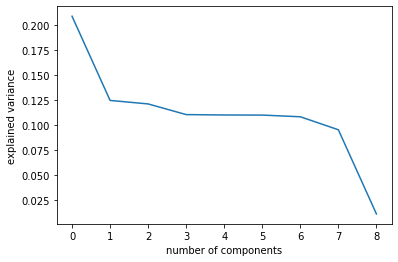

In [47]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [48]:
cov_matrix = np.dot(Pdf_normalized.T, Pdf_normalized) / Pdf.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

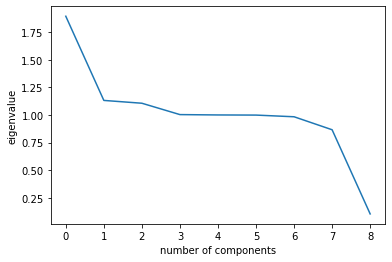

In [49]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [50]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],
index=Pdf.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Population,0.000159,-0.077116,-0.142991,-0.471914,0.660883,0.245593,0.503678,-0.011363,-0.000831
Children,-0.003822,0.106038,0.970125,-0.021364,0.213421,-0.029294,0.005490,-0.015866,-0.021300
Age,-0.012312,-0.056933,-0.081027,0.747663,0.421098,-0.383823,0.305958,0.110950,0.021837
Income,0.005506,0.004475,0.059194,0.453196,-0.115994,0.862909,0.172249,-0.057631,0.001062
Outage_sec_perweek,0.022610,0.701797,-0.067044,-0.038744,0.013688,0.066528,0.017600,0.704309,0.000567
Yearly_equip_failure,0.008977,0.107362,0.095760,-0.082110,-0.551711,-0.201443,0.786727,-0.092576,-0.002557
Tenure,0.705192,-0.060165,-0.005852,0.014365,0.001819,-0.008382,0.003776,0.038775,-0.705162
MonthlyCharge,0.045652,0.686883,-0.119676,0.062930,0.149372,-0.042587,-0.060763,-0.691152,-0.048116
Bandwidth_GB_Year,0.706988,-0.008584,0.017898,-0.006630,0.004350,-0.002077,-0.006492,-0.013099,0.706748


In [51]:
Pdf_normalized.head()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673371,0.214339,0.817875,-4.628573e-01,-0.637694,1.082093,-1.100300,-0.060610,-1.203402
1,0.047769,-0.606779,-1.459515,-7.418884e-01,0.079931,1.082093,-1.324259,1.589269,-1.253362
2,-0.417217,1.640937,-0.181955,5.566119e-14,-0.171841,1.082093,-0.744488,-0.337735,-0.648491
3,0.284523,-0.606779,-0.293047,-8.549922e-01,0.534199,-0.641808,-0.691542,-1.242096,-0.595482
4,0.110543,-1.356018,1.651066,5.592152e-03,-0.354778,1.082093,-1.303833,-0.538014,-1.508820


In [54]:
Final_dataframe = df

### Below is the final dataframe after cleaning and mitigation

In [ ]:
Final_dataframe

In [55]:
Final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              9549 non-null   float64
 15  Age                 

In [56]:
Final_dataframe.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436


#### When we take a look at the results of the Principal Component Analysis we obsere that variables 7 and 8 fall below the eigenvalue significance threshhold of 1, additionally the first variable has the highest contribution. We can safely assume that msot variables are signifcant enough to consider for further analysis, except for Bandwidth and MonthlyCharge. These variables do not carry enough significance to consider for future analysis!

## Limitations

#### Although we've identifited the key componenets for our Churn analysis our dataset has some limitations. the weight of our principal components analysis measures variance and signifiance, but in all the variables we decide to keep, only one has a distinct level of significance when compared to the others, the rest are equal amongst each other. We performed an analysis to determine which variables we can consider for a deeper future analysis. If population is the sole most important metric, it will be harder to determine what to consider in a multivariate exploratory analysis. Our initial question was only partially answered, we can consider another strategy to identify variance in the future. What this means for the company is that we have gave them some insight, and set the stage to analyze future. We have not fully realized all the trends contributing to the churn rate, but we have constituted the data's integrity. 